# Benin Solar Dataset EDA

**Objective:** Perform end-to-end profiling, cleaning, and exploratory data analysis of Benin’s solar dataset.  
**Author:** Tselot Million 
**Date:** 2025-11-06


In [20]:
# imports & setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams.update({'figure.figsize': (12,6)})
sns.set(style="whitegrid")


In [4]:
import os

os.listdir("../data")


['benin-malanville.csv']

In [21]:
country = "benin"   
raw_path = f"../data/{country}-malanville.csv"   
assert os.path.exists(raw_path), f"{raw_path} not found"

df = pd.read_csv(raw_path, parse_dates=["Timestamp"], dayfirst=False)
df = df.sort_values("Timestamp").reset_index(drop=True)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [22]:
# basic info & numeric summary
df.info()
display(df.describe())

# missing values
na_counts = df.isna().sum()
na_pct = (na_counts / len(df)) * 100
missing_report = pd.DataFrame({"count": na_counts, "pct_null": na_pct}).sort_values("pct_null", ascending=False)
display(missing_report)

# list columns with > 5% nulls
cols_over_5pct = missing_report[missing_report['pct_null'] > 5].index.tolist()
cols_over_5pct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


,count,pct_null
Comments,525600,100.0
WSstdev,0,0.0
TModB,0,0.0
TModA,0,0.0
Precipitation,0,0.0
Cleaning,0,0.0
BP,0,0.0
WDstdev,0,0.0
WD,0,0.0
Timestamp,0,0.0


['Comments']

**Columns with >5% missing values:** [paste output from previous cell]

**Cleaning plan:**  
- Drop unnecessary columns (e.g., 'Comments')  
- Impute key numeric columns with median

In [26]:
target_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
target_cols = [c for c in target_cols if c in df.columns]

# compute z-scores (uses population std; ddof=0)
z = df[target_cols].apply(lambda x: (x - x.mean()) / x.std(ddof=0))
for c in target_cols:
    df[c + "_zscore"] = z[c]
df['any_outlier_z3'] = z.abs().gt(3).any(axis=1)

# summary
outlier_counts = pd.Series({c: (z[c].abs() > 3).sum() for c in target_cols})
display(outlier_counts)
print("Rows with any |Z|>3:", df['any_outlier_z3'].sum())


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

Rows with any |Z|>3: 7740


In [27]:
# Drop columns with mostly missing data
if 'Comments' in df.columns:
    df = df.drop(columns=['Comments'])

# Median imputation for key columns
key_cols = ["GHI","DNI","DHI","ModA","ModB","Tamb","RH","WS","WSgust"]
key_cols = [c for c in key_cols if c in df.columns]

for c in key_cols:
    df[c] = df[c].fillna(df[c].median())

df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
Tamb      0
RH        0
WS        0
WSgust    0
dtype: int64

In [ ]:
Record median values used for reproducibility.

In [29]:
clean_path = f"../data/{country}_clean.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned data to:", clean_path)


Saved cleaned data to: ../data/benin_clean.csv


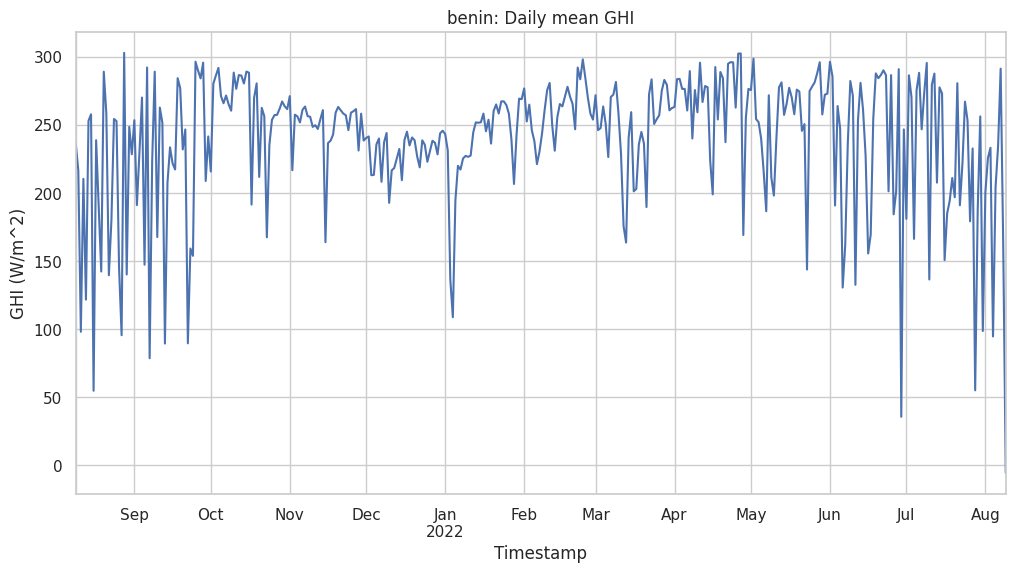

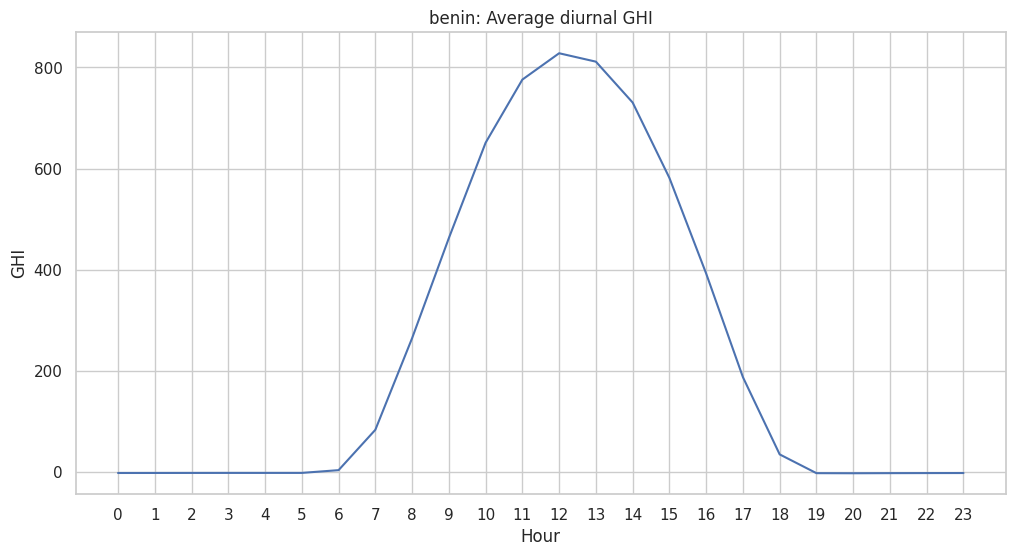

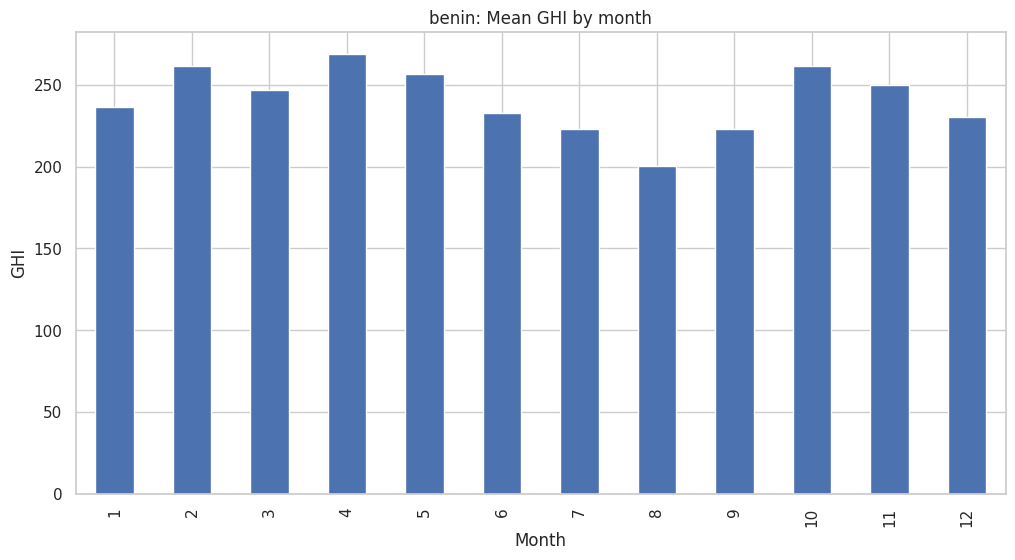

In [19]:
df_ts = df.set_index('Timestamp').sort_index()

# Daily mean GHI
if 'GHI' in df_ts.columns:
    df_ts['GHI'].resample('D').mean().plot(title=f"{country}: Daily mean GHI", ylabel="GHI (W/m^2)")
    plt.show()

# Diurnal pattern
df_ts['hour'] = df_ts.index.hour
if 'GHI' in df_ts.columns:
    hourly = df_ts.groupby('hour')['GHI'].mean()
    hourly.plot(title=f"{country}: Average diurnal GHI", xlabel="Hour", ylabel="GHI")
    plt.xticks(range(0,24))
    plt.show()

# Monthly patterns
df_ts['month'] = df_ts.index.month
if 'GHI' in df_ts.columns:
    df_ts.groupby('month')['GHI'].mean().plot(kind='bar', title=f"{country}: Mean GHI by month", xlabel='Month', ylabel='GHI')
    plt.show()


Comment on patterns: peaks, low months, anomalies.

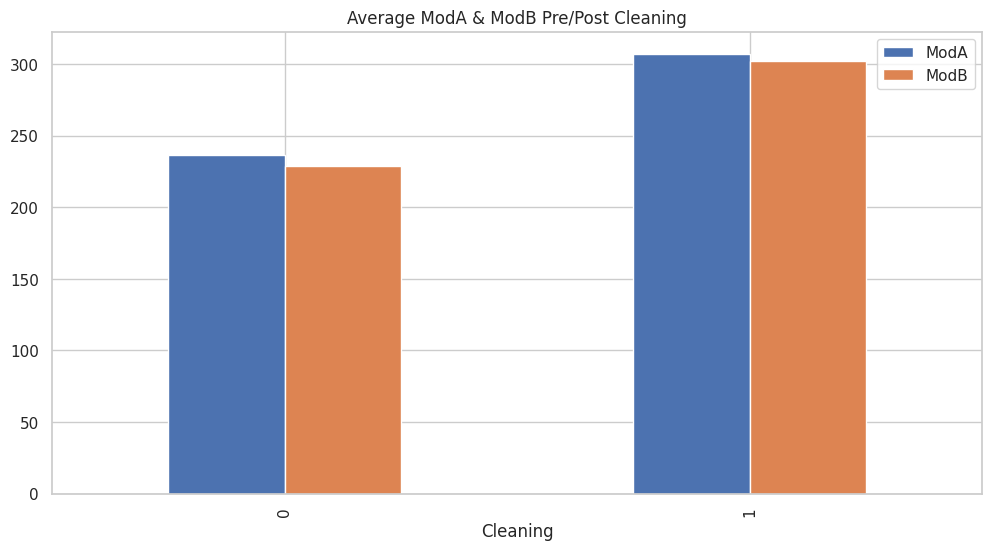

In [30]:
if 'Cleaning' in df.columns:
    df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', title="Average ModA & ModB Pre/Post Cleaning")
    plt.show()

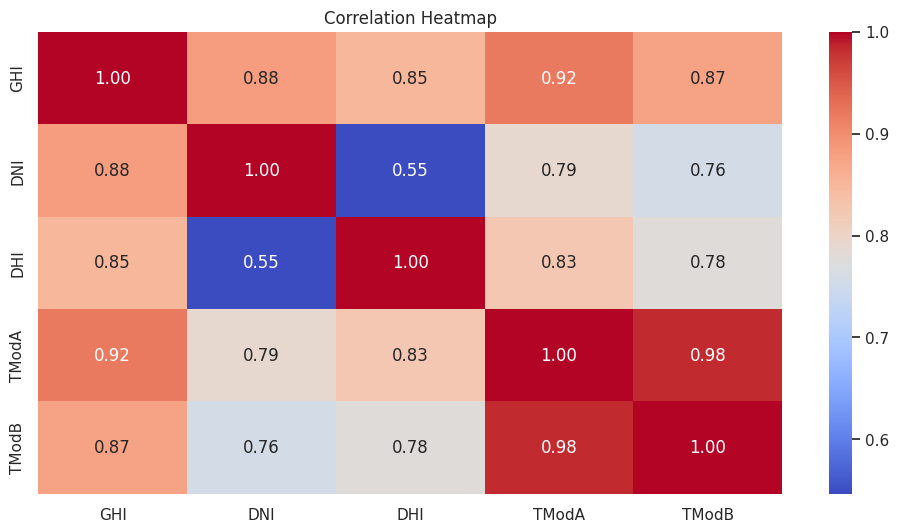

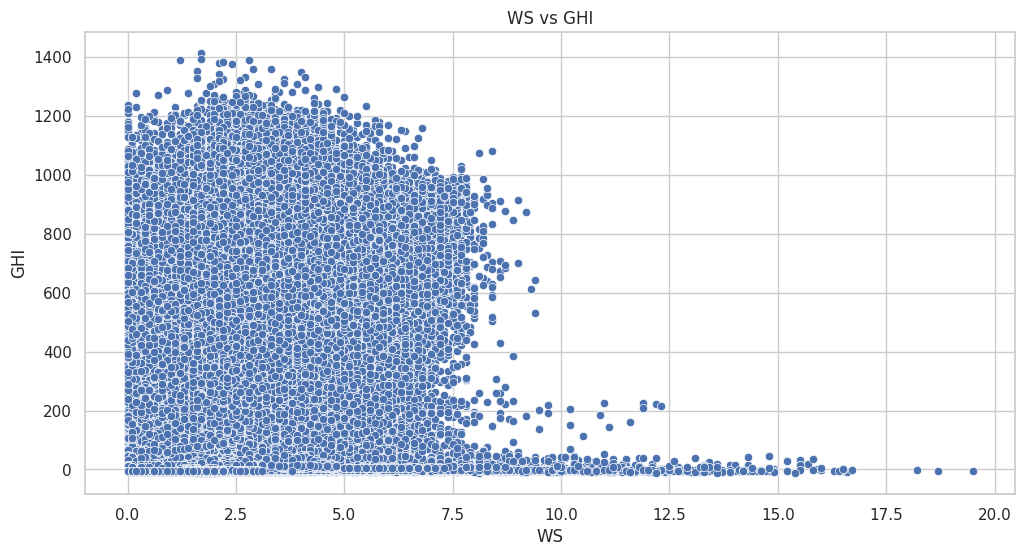

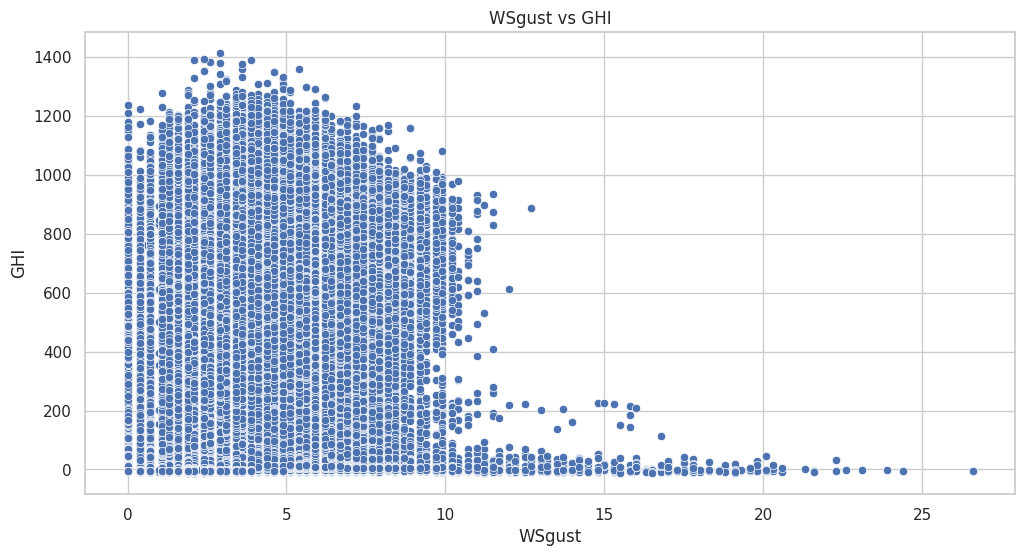

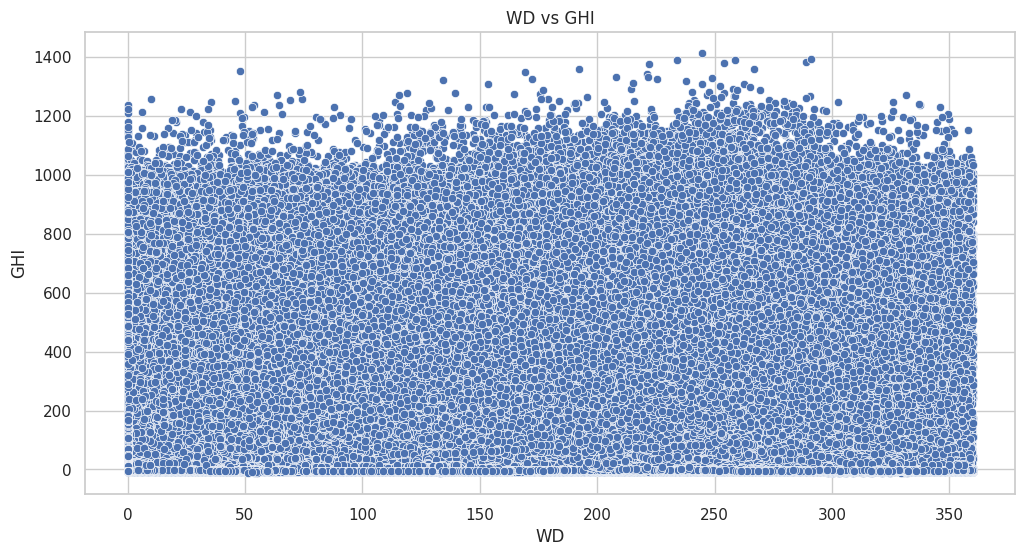

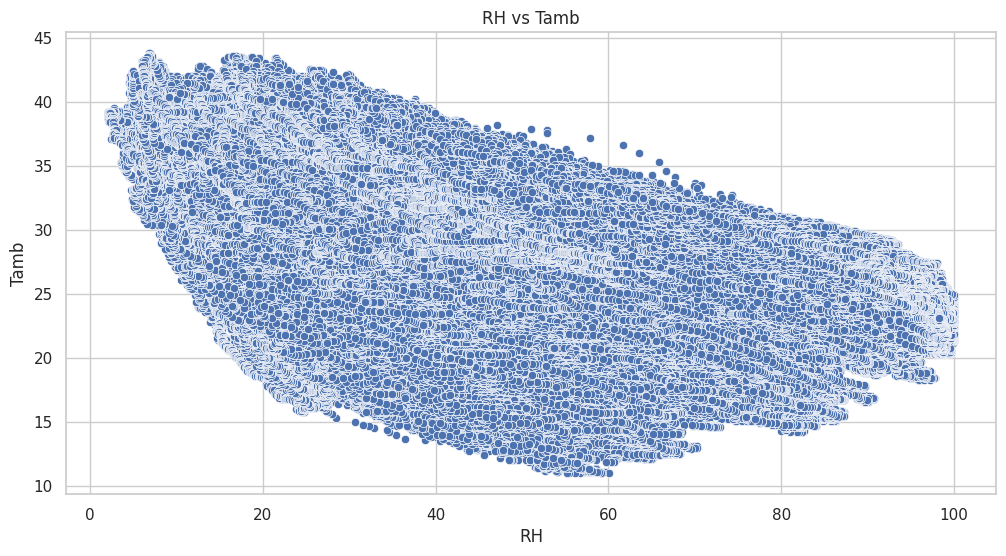

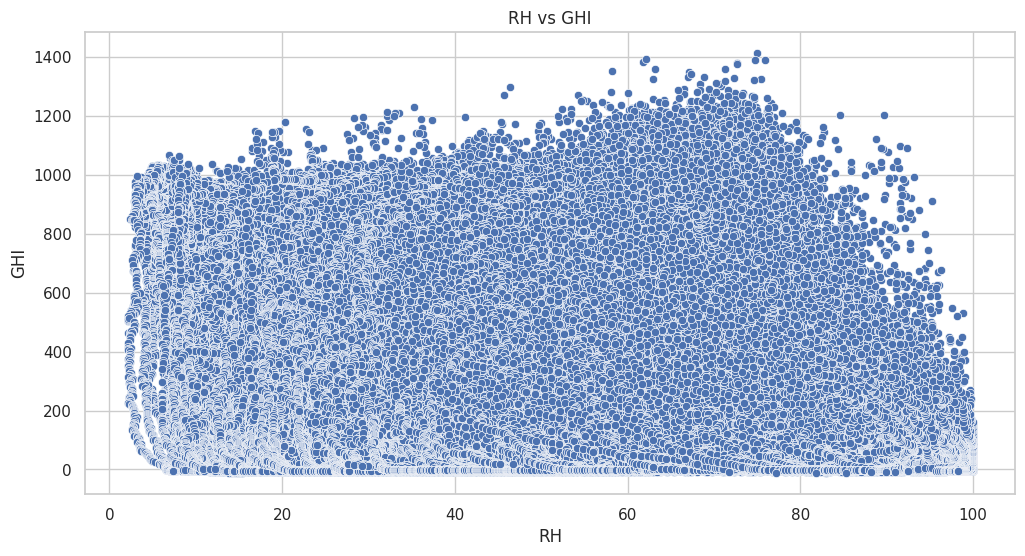

In [31]:
corr_cols = ['GHI','DNI','DHI','TModA','TModB']
corr_cols = [c for c in corr_cols if c in df.columns]

# Heatmap
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots WS, WSgust, WD vs. GHI
for col in ['WS','WSgust','WD']:
    if col in df.columns:
        sns.scatterplot(data=df, x=col, y='GHI')
        plt.title(f"{col} vs GHI")
        plt.show()

# Scatter RH vs Tamb and RH vs GHI
if 'RH' in df.columns and 'Tamb' in df.columns:
    sns.scatterplot(data=df, x='RH', y='Tamb')
    plt.title("RH vs Tamb")
    plt.show()

if 'RH' in df.columns:
    sns.scatterplot(data=df, x='RH', y='GHI')
    plt.title("RH vs GHI")
    plt.show()


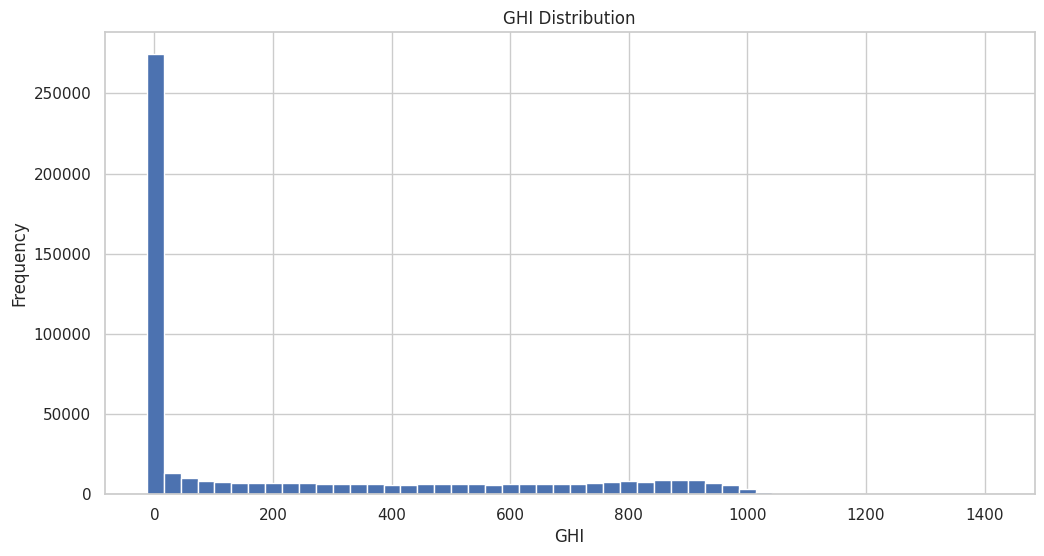

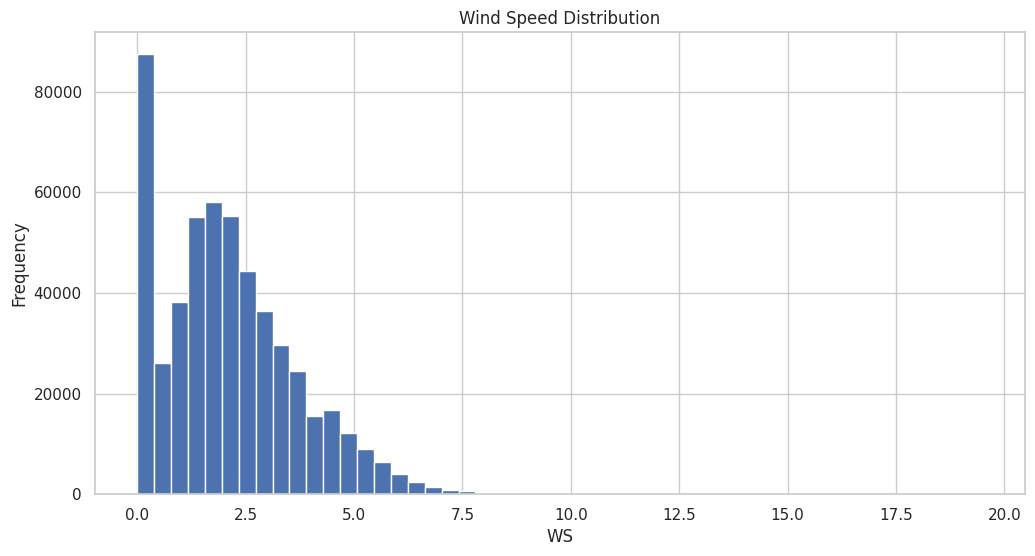

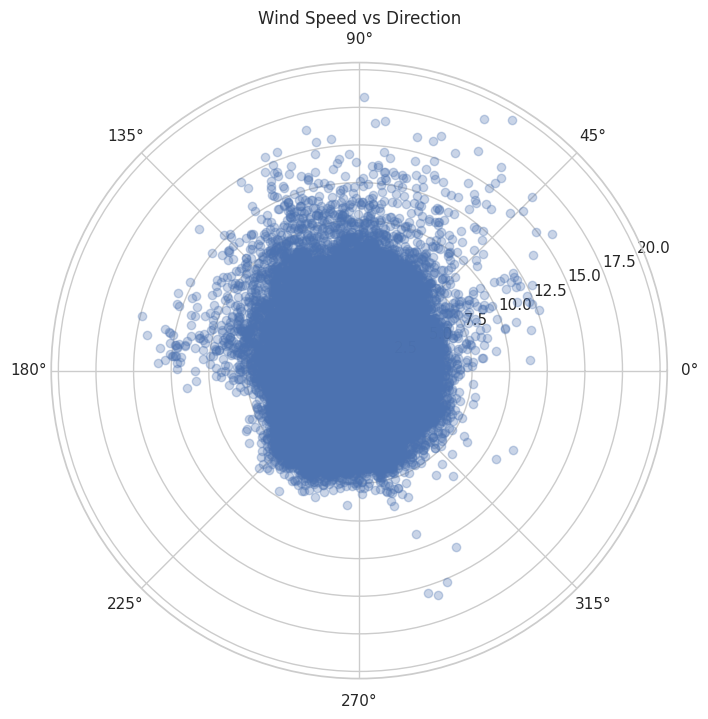

In [32]:
# Histogram for GHI
df['GHI'].hist(bins=50)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
if 'WS' in df.columns:
    df['WS'].hist(bins=50)
    plt.title("Wind Speed Distribution")
    plt.xlabel("WS")
    plt.ylabel("Frequency")
    plt.show()

# Simple Wind Rose (radial scatter)
if 'WS' in df.columns and 'WD' in df.columns:
    plt.figure(figsize=(8,8))
    theta = np.deg2rad(df['WD'])
    r = df['WS']
    plt.subplot(111, polar=True)
    plt.scatter(theta, r, alpha=0.3)
    plt.title("Wind Speed vs Direction")
    plt.show()


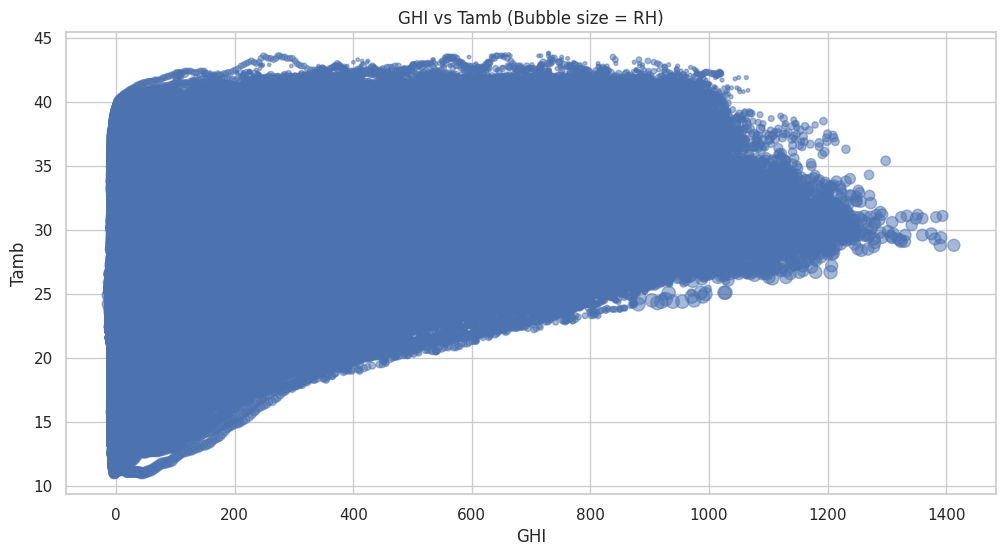

In [33]:
# Bubble chart GHI vs Tamb with RH size
if all(c in df.columns for c in ['GHI','Tamb','RH']):
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
    plt.xlabel("GHI")
    plt.ylabel("Tamb")
    plt.title("GHI vs Tamb (Bubble size = RH)")
    plt.show()


## Key Insights / KPIs

1. **References / Self-learning:** [Add links to tutorials, papers, or documentation you used]  
2. **EDA Techniques Applied:** summary stats, missing values, Z-score outlier detection, time series plots, scatter plots, heatmaps, histograms, bubble charts  
3. **Observations / Insights:**  
   - Solar peaks and low periods: [fill based on your plots]  
   - Correlations between solar irradiance and sensor readings: [fill based on heatmap]  
   - Impact of cleaning on ModA/ModB: [fill based on cleaning plot]  
   - Wind and temperature trends: [fill based on wind/temperature plots]  
   - Influence of RH on temperature and GHI: [fill based on bubble chart]
